In [1]:
import nd2
import numpy as np
import napari
import pandas as pd
from utils import plots_results_on_image, calculate_colocalization, calculate_props, extract_labels

In [2]:
img = nd2.imread('./raw_data/240515_40x_cameraAlignment_largerGreen - Denoised_registered.nd2')
img.shape

(2, 2720, 2720)

In [3]:
ch_0, ch_1, ch_0_labels, ch_1_labels = extract_labels(img, threshold_ch0=1200, threshold_ch1=220)

In [4]:
# Visualize results in Napari
viewer = napari.Viewer(ndisplay=2)
viewer.add_image(ch_0)
viewer.add_labels(ch_0_labels)
viewer.add_image(ch_1)
viewer.add_labels(ch_1_labels)

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


<Labels layer 'ch_1_labels' at 0x19b38e802b0>

In [5]:
# Example usage
percentage_positive_both = calculate_colocalization(ch_0_labels, ch_1_labels)


In [6]:
results_ch0 = calculate_props(ch_0_labels, ch_0)
results_ch1 = calculate_props(ch_1_labels, ch_1)

In [7]:
df_ch0 = pd.DataFrame(results_ch0)
df_ch1 = pd.DataFrame(results_ch1)


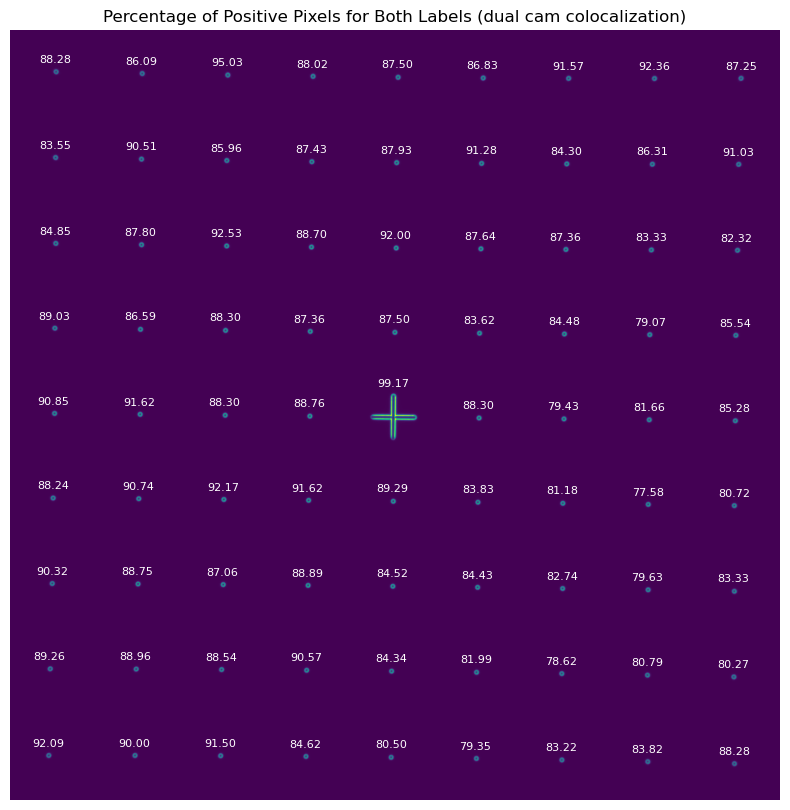

In [8]:
plots_results_on_image(ch_0, ch_0_labels, percentage_positive_both, title="Percentage of Positive Pixels for Both Labels (dual cam colocalization)")

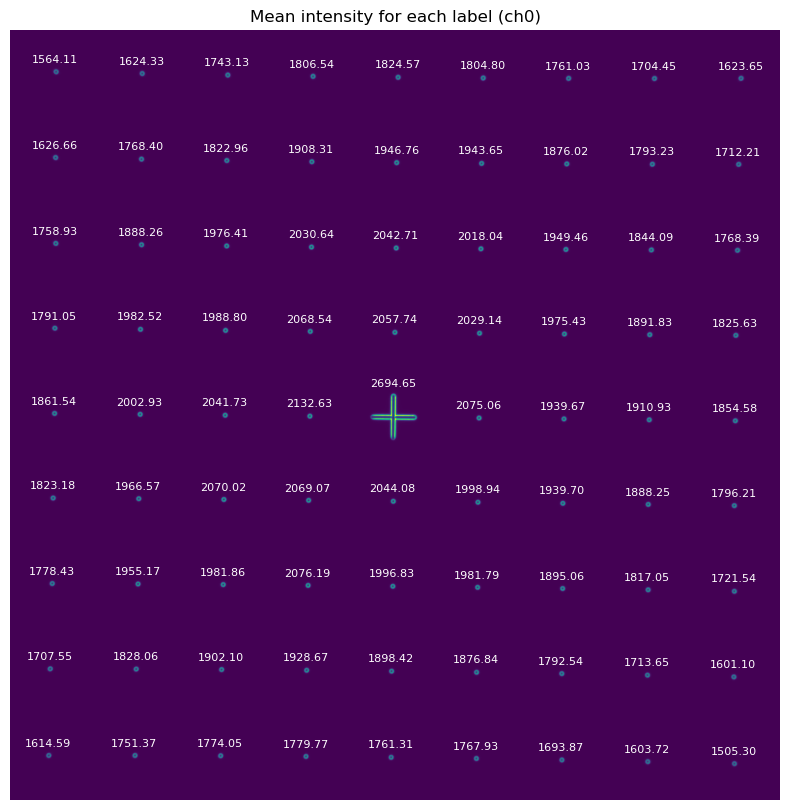

In [9]:
plots_results_on_image(ch_0, ch_0_labels, results_ch0['intensity_mean'], title="Mean intensity for each label (ch0)")

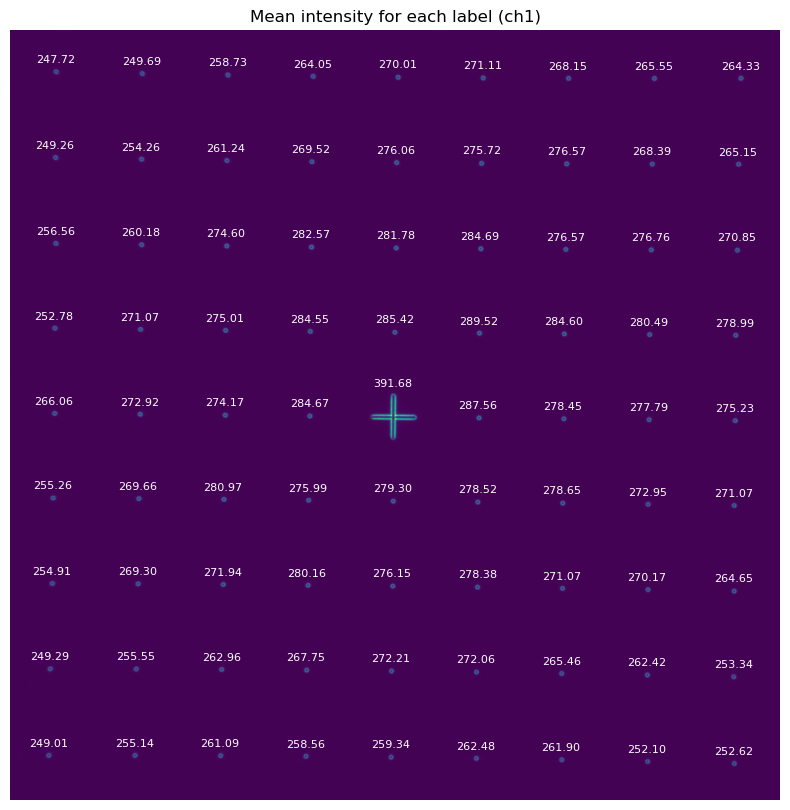

In [10]:
plots_results_on_image(ch_1, ch_1_labels, results_ch1['intensity_mean'], title="Mean intensity for each label (ch1)")